# Sentiment Analysis on Product Reviews
- Dataset: Amazon Product Review Dataset
- Ideas: Use NLP techniques to analyze sentiment in product reviews and identify areas of
improvement or highlight standout features of a product.

Link to the dataset: https://drive.google.com/drive/folders/1Vbz73qJ0GlhFIvm8NIipbIqtE5M7t_tm

In [17]:
#importing required datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r"C:\Users\mishr\OneDrive\Desktop\IITD AIML\Final Project\amazon.csv")
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [18]:
# Removing any duplicates
df = df.drop_duplicates()

# Removing outliers in rating
df = df[(df['overall'] >= 1) & (df['overall'] <= 5)]

# Checking for missing values
print("Missing values:", df.isnull().sum())

# Droping rows where either overall or reviewText is missing
df.dropna(subset=['overall', 'reviewText'], inplace=True)

Missing values: Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [23]:
# Text cleaning 

# Importing required libraries
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Removing all special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Converting to lower case
    tokens = [word.lower() for word in tokens]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Reassembling the cleaned text
    cleaned_text = " ".join(tokens)
    
    return cleaned_text

# Applying the text cleaning function to the 'reviewText' column
df['cleaned_reviewText'] = df['reviewText'].apply(clean_text)

# Labeling encoding based on rating: Positive (4-5), Neutral (3), Negative (1-2)
df['Sentiment'] = df['overall'].apply(lambda x: 'Positive' if x >= 4 else ('Neutral' if x == 3 else 'Negative'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


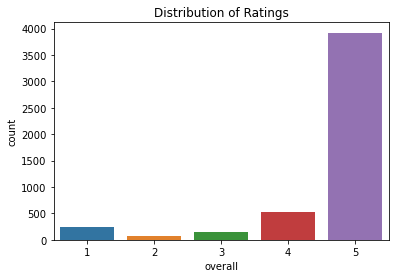

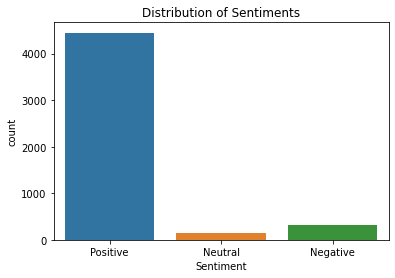

In [24]:
# Exploring the dataset
# Plotting the distribution of ratings
sns.countplot(data=df, x='overall')
plt.title('Distribution of Ratings')
plt.show()

# Plotting the distribution of sentiments
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.show()

In [25]:
# Model building
# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['reviewText'])

# Combining review with rating
X_rating = df['overall'].values.reshape(-1, 1)
X = np.hstack((X_text.toarray(), X_rating))

y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

Accuracy: 0.9125127161749745
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        56
     Neutral       0.00      0.00      0.00        30
    Positive       0.91      1.00      0.95       897

    accuracy                           0.91       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.83      0.91      0.87       983



C:\Users\mishr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mishr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


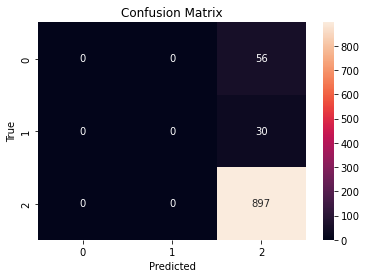

C:\Users\mishr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


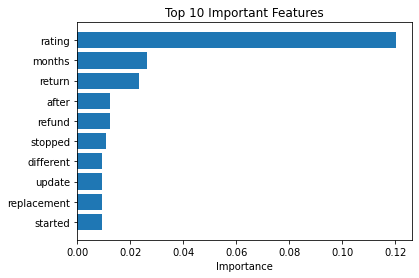

In [26]:
# Model evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance - standout features
feature_names = vectorizer.get_feature_names() + ['rating']
importance = model.feature_importances_
sorted_idx = np.argsort(importance)[-10:]  # top 10 features
plt.title("Top 10 Important Features")
plt.barh(range(10), importance[sorted_idx])
plt.yticks(range(10), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance")
plt.show()